In [2]:
from matplotlib import pyplot

import matplotlib.pyplot as plt 
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv

##################
# Data Definitions (these data definition will be for the first csv file)

PoliticalParty = Enum('PoliticalParty',['democrat','republican'])
#interp. the political parties, one is democratic (democrat),
#another is republican(republican)

#examples are redundant for enumeration

# template based on enumeration (2 cases)
@typecheck
def fn_for_political_party(pp: PoliticalParty) -> ...:
    if pp == PoliticalParty.democrat:
        return ...
    elif pp == PoliticalParty.republican:
        return ...

NewsData = NamedTuple('NewsData',[('year_1',int), #in range [1980,2016]
                                ('party_endorse',PoliticalParty),]) 
                      
#interp. the year the election took place (year_1) and the political party that the Newspaper supported (party_endorse).

ND1 = NewsData(2020,PoliticalParty.democrat)
ND2 = NewsData(2016,PoliticalParty.republican)
ND3 = NewsData(1980,PoliticalParty.democrat)

#template based on compound (2 field) and reference rule
@typecheck
def fn_for_news_data(nd: NewsData) -> ...:
    return ...(nd.year_1,
              fn_for_political_party(nd.party_endorse))

##################
# Data Definitions (these data definition will be for the second csv file)

VotesData = NamedTuple('VotesData',[('year_2',int), #in range [1980,2016]
                                   ('party',PoliticalParty),
                                    ('votes',int),  #in range [0,...]
                                   ('is_winner',bool)])
#interp. This will be the data for the number of votes per election which includes:
#the year the election took place (year_2), the Political party (party), the number of votes the political party got(votes)
#and if that politcal party won (is_winner)

VD1 = VotesData(2020,PoliticalParty.democrat,81268924,True)
VD2 = VotesData(1980,PoliticalParty.republican,259339,False)

#template based on compound (4 fields) and reference rule
@typecheck
def fn_for_votes_data(vd: VotesData) -> ...:
    return ...(vd.year_2,
              fn_for_political_party(nd.party),
              nd.votes,
              nd.is_winner)

#the reason why I have year_1,year_2 and party_endorse,party is because I have two csv files. 
#by writing my code this way, it will be less confusing. 
#Having seperate years and party will make my code easier to read when I have to graph this infomation

#List[NewsData]
#interp. a list of NewsData

LOND1 = []
LOND2 = [ND1,ND2,ND3]

# template based on arbitrary-sized data and reference rule
@typecheck
def fn_for_lond(lond: List[NewsData]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for nd in lond:
        acc = ...(fn_for_news_data(nd), acc)
        
    return ...(acc)

#List[VotesData]
#interp. a list of VotesData

LOND1 = []
LOND2 = [VD1,VD2]

# template based on arbitrary-sized data and reference rule
@typecheck
def fn_for_lovd(lovd: List[VotesData]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for vd in lovd:
        acc = ...(fn_for_votes_data(vd), acc)
        
    return ...(acc)

#templates that might be needed later on for this project

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'world']


# template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for s in los:
        acc = ...(s, acc)
        
    return ...(acc)

# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    for i in loi:
        acc = ...(i, acc)
    return ...(acc)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

YEARS = [1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]

@typecheck
def main(filename_of_newspaper_endorsement: str,filename_of_votes: str, year: List[int])-> None:
    """
    given two files, read us-presidential newspaper endorsements file and read canadiate infomation for each election file
    using the data from the newspaper us presidential endorsements file return a bar graph containing the percentage of republican votes over given years
    using the data from the votes for each canadiate file return a line graph containin percentage of newspapers that endorsed the republican party over given years
    both the bar graph and line graph will be on the same graph
    assume the given year list is not empty.
    """
    #return None #stub
    #template based on composition
    return create_graph_with_file_datas_and_year(read1(filename_of_newspaper_endorsement),read2(filename_of_votes),year)

###########
# Functions for reading first csv file

@typecheck
def read1(filename: str) -> List[NewsData]:
    """    
    reads information from the specified file and returns a list of NewsData. 
    This is the first read function that will only read the csv file that contain newspaper support data.
    """
    #return []  #stub
    # Template from HtDAP
    # lond contains the result so far
    lond = [] # type: List[NewsData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            if is_news_political(row):
                nd = NewsData(parse_int(row[1]),parse_party(row[3]))
                lond.append(nd)
    return lond

@typecheck
def is_news_political(row: List[str]) -> bool:
    """
    return True if the political party (row[3]) is either 'Democratic' or 'Republican'. False Otherwise 
    Assume that the row is complete. As well as there is a string in row[3]
    This project is only considering Newspaper that shows support to either Democratic or Republican. No other political parties
    """
    #return False #stub
    #return...(row) #template
    return row[3] == 'Democratic' or row[3] == 'Republican'

@typecheck
def parse_party(s:str) -> PoliticalParty:
    """
    Given a string which must be either 'Democratic' or 'Republican', return the corresponding PoliticalParty. 
    """
    #return PoliticalParty.democrat #stub
    #return...(s) #template
    if s == 'Democratic':
        return PoliticalParty.democrat
    elif s == 'Republican':
        return PoliticalParty.republican
    
###########
# Functions for reading second csv file

@typecheck
def read2(filename: str) -> List[VotesData]:
    """    
    reads information from the specified file and returns a list of VotesData.
    This is the second read function that will only read csv files that contain data about election votes.
    """
    #return []  #stub
    #Template from HtDAP
    #lovd contains the result so far
    lovd = [] # type: List[VotesData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            if is_votes_political(row):
                vd = VotesData(parse_int(row[1]),parse_party(row[2]),parse_int(row[3]),parse_is_winner(row[4]))
                lovd.append(vd)
    
    return lovd  

def is_votes_political(row: List[str]) -> bool:
    """
    return True if the political party (row[2]) is either 'Democratic' or 'Republican'. False Otherwise
    Assume that the row is complete. As well as there is a string in row[2]. 
    This project is only considering votes that are for the Democratic or Republican. No other political parties
    """
    #return False #stub
    #return...(row) #template
    return row[2] == 'Democratic' or row[2] == 'Republican'

@typecheck
def parse_is_winner(s: str)-> bool:
    """
    return True if the given string is 'Winner.'; False Otherwise
    """
    #return False #stub
    #return ...(s) #template
    if s == 'Winner.':
        return True
    else:
        return False

###########
# Functions for create_graph_with_file_datas_and_year function and its helper functions

@typecheck
def create_graph_with_file_datas_and_year(lond: List[NewsData],lovd: List[VotesData],years: List[int])-> None:
    """
    given a list of News Data (lond),a list of Votesdata (lovd) and years. 
    using the given lovd return a bar graph containing the percentage of republican votes over given years
    using the given lond return a line graph containin percentage of newspapers that endorsed the republican party over given years
    both the line graph and bar graph will be on the same graph
    assume the given year list is not empty. Since the x-axis values are dependent on years, years can not be an empty list
    """
    #return None #stub
    #template based on visualization
    
    graph = pd.DataFrame({
    'newspaper_endorsement_percentage' : percentage_of_newspaper_endorsement_list(lond,years),
    'votes_percentage' : percentage_of_votes_list(lovd,years)})

    graph['votes_percentage'].plot(kind='bar', width =0.30, color = 'blue')
    graph['newspaper_endorsement_percentage'].plot(secondary_y=False, color = 'red',linestyle='--',marker='.',markersize=15)

    #y-axis minimum and maximum 
    plt.ylim([0,100])

    #value on the x-axis 
    ax = plt.gca()
    ax.set_xticklabels(years)

    #location of the legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    
    #title
    plt.title('Percentage of republican votes and percentage of newspaper that endorse republicans over year')
    
    #labels
    plt.ylabel('Percentage (%)')
    plt.xlabel("Years")
    
    #return the graph
    plt.show()

@typecheck
def percentage_of_newspaper_endorsement_list(lond: List[NewsData], years: List[int]) -> List[float]:
    """
    given a List of years (years) and list of News Data (lond)
    return a list of percentage of newspaper that endorse the republican party for each given year 
    assume
    """
    #return [0.0] #stub
    #template based on List[int] with an extra parameter and reference rule
    list_of_percentage_republican_newspaper = [] #type: List[float]
    #a list of percent of newspapers that endorse republican seen so far
    for year in years:
        republican_newspaper_endorsement_percentage = determine_newspaper_percentage_for_year(lond,year)
        
        list_of_percentage_republican_newspaper.append(republican_newspaper_endorsement_percentage)
        
    return list_of_percentage_republican_newspaper

@typecheck
def determine_newspaper_percentage_for_year(lond: List[NewsData], year: int) -> float:
    """
    given a List of News Data (lond) 
    return the percentage of newspapers that endorse the republican party for the given year
    """
    #return 1.3 #stub
    #template based on List[NewsData] with an extra parameter
    total_democrat_endorsed_newspaper = 0.0 #type: float
    #total number of numbers papers that endorse the democrat party for the given year seen so far
    
    total_republican_endorsed_newspaper = 0.0 #type: float
    #total number of numbers papers that endorse the republican party for the given year seen so far
    
    for nd in lond:
        if is_newspaper_correct_year_and_democrat(nd,year):
            total_democrat_endorsed_newspaper = total_democrat_endorsed_newspaper + 1
            
        elif is_newspaper_correct_year_and_republican(nd,year):
            total_republican_endorsed_newspaper = total_republican_endorsed_newspaper + 1
            
    percentage_of_newspaper_endorse_republican = determine_percentage(total_democrat_endorsed_newspaper,total_republican_endorsed_newspaper)
    
    return percentage_of_newspaper_endorse_republican

@typecheck
def determine_percentage(number1: float, number2: float) -> float:
    """
    given two numbers, return the percentage of the second number divided by the sum of the two numbers
    """
    #return 0.0 #stub
    #return ...(number1,number2) #template
    if number1 != 0 or number2 != 0:
        final = (number2 / (number1 + number2)) * 100
        return round(final,1)
    else:
        return 0.0

@typecheck
def is_newspaper_correct_year_and_democrat(nd: NewsData, year: int) -> bool:
    """
    return True if the given nd (NewsData) has the same year as the given year and is PoliticalParty.democrat
    False otherwise
    """
    #return False #stub
    #template based on NewsData with an extra parameter
    if nd.year_1 == year and nd.party_endorse == PoliticalParty.democrat:
        return True
    else:
        return False

@typecheck
def is_newspaper_correct_year_and_republican(nd: NewsData, year: int) -> bool:
    """
    return True if the given nd (NewsData) has the same year as the given year and is PoliticalParty.republican
    False otherwise
    """
    #return False #stub
    #template based on NewsData with an extra parameter
    if nd.year_1 == year and nd.party_endorse == PoliticalParty.republican:
        return True
    else:
        return False

@typecheck
def percentage_of_votes_list(lovd: List[VotesData],years:List[int])-> List[float]:
    """
    given a List of years (years) and list of Votes Data (lovd)
    return a list of percentage of republican votes for each given year 
    """
    #return [0.3] #stub
    #template based on List[VotesData] with an extra parameter
    
    list_of_percentage_republican_votes = [] #type: List[float]
    #list of percentage of republican votes seen so far
    for year in years:
        percentage_votes_republican = determine_votes_percentage_for_year(lovd,year)
        
        list_of_percentage_republican_votes.append(percentage_votes_republican)
        
    return list_of_percentage_republican_votes

@typecheck
def determine_votes_percentage_for_year(lovd: List[VotesData], year: int) -> float:
    """
    given a List of Votes Data return the percentage of republican votes for the given year
    """
    #return 1.4 #stub
    #template based on List[VotesData] with an extra parameter
    
    total_democrat_votes = 0.0 #type: float
    #total number of democrat votes for a given year seen so far
    
    total_republican_votes = 0.0 #type: float
    #total number of republican votes for a given year seen so far
    
    for vd in lovd:
        if is_votes_correct_year_and_democrat(vd,year):
            total_democrat_votes = vd.votes
            
        elif is_votes_correct_year_and_republican(vd,year):
            total_republican_votes = vd.votes
            
    percentage_votes_republican = determine_percentage(total_democrat_votes,total_republican_votes)
    
    return percentage_votes_republican

@typecheck
def is_votes_correct_year_and_democrat(vd: VotesData, year: int) -> bool:
    """
    return True if VotesData (vd) is PoliticalParty.democrat and is the same year as the given year. False Otherwise
    """
    #return False #stub
    ##template based on VotesData with an extra parameter
    if vd.year_2 == year and vd.party == PoliticalParty.democrat:
        return True
    else:
        return False

@typecheck
def is_votes_correct_year_and_republican(vd: VotesData, year: int) -> bool:
    """
    return True if VotesData (vd) is PoliticalParty.republican and is the same year as the given year. False Otherwise
    """
    #return True #stub
    ##template based on VotesData with an extra parameter
    if vd.year_2 == year and vd.party == PoliticalParty.republican:
        return True
    else:
        return False

A First Level Header
====================

A Second Level Header
---------------------

Now is the time for all good men to come to
the aid of their country. This is just a
regular paragraph.

The quick brown fox jumped over the lazy
dog's back.

### Header 3

> This is a blockquote.
> 
> This is the second paragraph in the blockquote.
>
> ## This is an H2 in a blockquote

<h1>A First Level Header</h1>

<h2>A Second Level Header</h2>

<p>Now is the time for all good men to come to
the aid of their country. This is just a
regular paragraph.</p>

<p>The quick brown fox jumped over the lazy
dog's back.</p>

<h3>Header 3</h3>

<blockquote>
    <p>This is a blockquote.</p>

    <p>This is the second paragraph in the blockquote.</p>

    <h2>This is an H2 in a blockquote</h2>
</blockquote>

Some of these words *are emphasized*.
Some of these words _are emphasized also_.

Use two asterisks for **strong emphasis**.
Or, if you prefer, __use two underscores instead__.

<p>Some of these words <em>are emphasized</em>.
Some of these words <em>are emphasized also</em>.</p>

+   Candy.
+   Gum.
+   Booze.

<p>I get 10 times more traffic from <a href="http://google.com/"
title="Google">Google</a> than from <a href="http://search.yahoo.com/"
title="Yahoo Search">Yahoo</a> or <a href="http://search.msn.com/"
title="MSN Search">MSN</a>.</p>

<p>I start my morning with a cup of coffee and
<a href="http://www.nytimes.com/">The New York Times</a>.</p>
<span style="color:blue">some *blue* text</span

Compsci 103 - Final Project Presentation -Jason Zhao - 36658664
====================
1.What is my project?
---------------------
+ My project looks at the percentage of republican votes over the election years from 1980 to 2016. As well as the percentage of newspapers than endorse the republican party between the year 1980 to 2016. 
+ I will graph the percentage of republican votes over years as a bar graph and the percentage of newspapers that endorse the republican party over years as a line graph. Both of data will be on the same graph.
+ I compared to bar graph and the line graph and see if there is a correlation.

2.Why am I interested?
---------------------
+ During these past two presidential election, there was a lot of claims about false news and how it affected the election. 
+ I wanted to see if the news actually had an affect on the election results. As well as if this trend between news media and election results in previous election (not only the past two elections). 

3.Where is my Infomation from?
---------------------
+ the infomation about what the newspaper endorsed came from <a href="https://github.com/veltman/endorsements">github</a>.</p> This infomation was already in a csv file. My infomation about election results came from <a href="https://en.wikipedia.org/wiki/List_of_United_States_presidential_candidates_by_number_of_votes_received">wikipedia</a>.</p> Since this infomation came from wikipedia, I had to take the infomation can put it in a csv file. 


4.The Design
---------------------
+ 
#### Newspaper csv file
+ On the newspaper endorsement csv file, it contained newspaper publication,year,endorsed canadiate ,endorsed party,source,source2,notes. From this, I created a NamedTuple that contained year and endorsed party. I filtered the csv file for only newspapers that endorsed either the republican or the democrat party. I then totaled the amount of newspapers that endorse either democrat or republican for a given year. I then converted this infomation to percentage of newspapers that endorse republican party. I graphed this data over year in a line graph.
#### Votes csv file
+ On the number of votes per election file, it contained canadiate,year,party,votes,winner or runner up or other. I created a NamedTuple that contained year, party, number of votes and if the party won the election. I filtered this data for only number of republican votes and democrat votes. I did not consider the other parties. Then I totaled the total number of republican votes for a given election year. I determined the percentage of republican votes from this data. I graphed this data over year in a bar graph. 
#### Democrat vs Republican
+ In my project I only considered democrats and republican. This is because America is basically a two party system and the other two party barely get any votes in election. I also had to not consider the other parties because of limited time to do the project
#### Why Republican Party?
+ There was no reason why I chose republican party instead of democrat party. Since I am only considering two parties, deciding to use republican or democrat party would have no difference. If I want percentage of newspaper that endorse democrat or percentage of democrat votes, I would just do 100% - %republican. 

5.Answer
---------------------
+ As seen with the graph below, there is a correlation between newspaper endorsement and election votes results. This correlation appears for all election years, not just the past two election. 

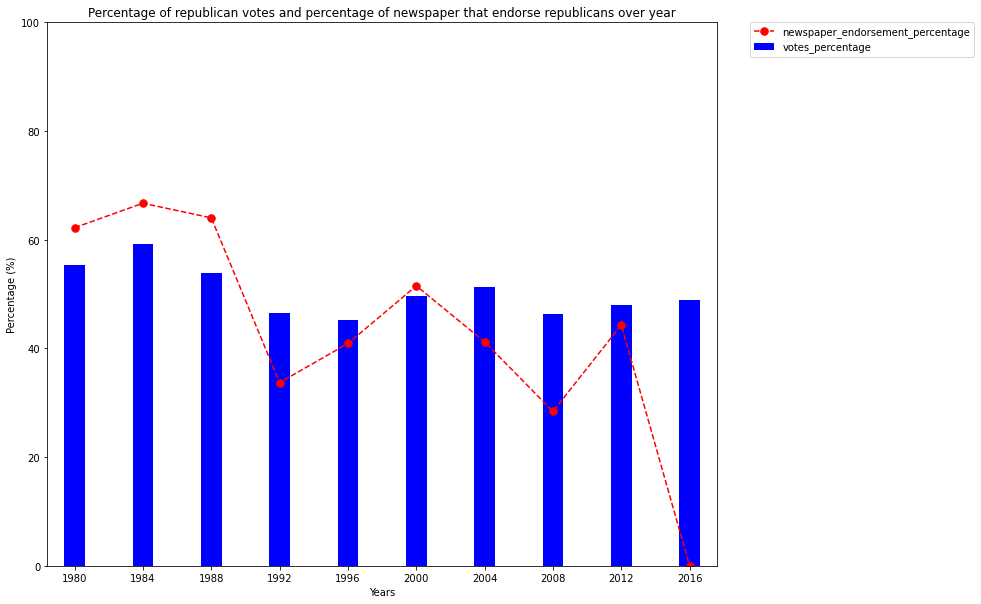

In [3]:
pyplot.figure(figsize=(12,10))
main('us-presidential-endorsements.csv','number-of-votes.csv',YEARS)


6.Difficulties
---------------------
+ Having to take infomation from two csv was a challenge for me. There was a lot of infomation so my code could get big very quickly. I had to make two NamedTuple and two read function, one for each csv file. My code totaled to 450 lines which is a lot to keep track of.
+ Another challenge I faced is how calculate percentage of republican endored newspaper and republican votes. Calculating the percentage was different from anything I've done in class. I had to store two infomation in each determine function. One stored infomation was for democrat and the other stored infomation is for republican party. 

In [ ]:
@typecheck
def determine_newspaper_percentage_for_year(lond: List[NewsData], year: int) -> float:
    """
    given a List of News Data (lond) 
    return the percentage of newspapers that endorse the republican party for the given year
    """
    #return 1.3 #stub
    #template based on List[NewsData] with an extra parameter
    total_democrat_endorsed_newspaper = 0.0 #type: float
    #total number of numbers papers that endorse the democrat party for the given year seen so far
    
    total_republican_endorsed_newspaper = 0.0 #type: float
    #total number of numbers papers that endorse the republican party for the given year seen so far
    
    for nd in lond:
        if is_newspaper_correct_year_and_democrat(nd,year):
            total_democrat_endorsed_newspaper = total_democrat_endorsed_newspaper + 1
            
        elif is_newspaper_correct_year_and_republican(nd,year):
            total_republican_endorsed_newspaper = total_republican_endorsed_newspaper + 1
            
    percentage_of_newspaper_endorse_republican = determine_percentage(total_democrat_endorsed_newspaper,total_republican_endorsed_newspaper)
    
    return percentage_of_newspaper_endorse_republican

@typecheck
def determine_votes_percentage_for_year(lovd: List[VotesData], year: int) -> float:
    """
    given a List of Votes Data return the percentage of republican votes for the given year
    """
    #return 1.4 #stub
    #template based on List[VotesData] with an extra parameter
    
    total_democrat_votes = 0.0 #type: float
    #total number of democrat votes for a given year seen so far
    
    total_republican_votes = 0.0 #type: float
    #total number of republican votes for a given year seen so far
    
    for vd in lovd:
        if is_votes_correct_year_and_democrat(vd,year):
            total_democrat_votes = vd.votes
            
        elif is_votes_correct_year_and_republican(vd,year):
            total_republican_votes = vd.votes
            
    percentage_votes_republican = determine_percentage(total_democrat_votes,total_republican_votes)
    
    return percentage_votes_republican

+ Another challenge I faced was how to do my NamedTuple. Both NamedTuple contained infomation about year. I decided to make the two year different so that the two NamedTuple would not get mixed up.

In [3]:
NewsData = NamedTuple('NewsData',[('year_1',int), #in range [1980,2016]
                                ('party_endorse',PoliticalParty),]) 
VotesData = NamedTuple('VotesData',[('year_2',int), #in range [1980,2016]
                                   ('party',PoliticalParty),
                                    ('votes',int),  #in range [0,...]
                                   ('is_winner',bool)])

+ Having infomation from both csv file on one graph was another challenge I faced. I had to teach myself how to make a bar/line graph. 

7.Disccusions
---------------------
+ There is an outlier in my data. For 2016 republican newspaper endorsement, this percentage is zero. I checked my data and it seems that no newspaper endorsed the republican party. I believe this is because of how contraversal this year was as well as how little data I have. 
+ For future projects, they should use more infomation. There should be more newspaper endorsement data. I would also like to see the affects of the other political parties. 
+ I now know how to show different data on the same graph. Not just using line graphs. 